# Analyzing Weather Trends in Oakland and the Planet Earth
**from 1849 to 2013**


## Introduction
This project explores weather trends in Oakland United States and generally the Planet Earth. I will try to discover similarities and differences between the world averages and Oakland’s averages, as well as overall trends. I will calculate the moving average temperatures to smoothen the plotlines.


## Database
This project uses data from the weather trends database which has the following schema:
```
<table>: <fields>
city_data: year, city, country, avg_temp
city_list: city, country
global_data: year, avg_temp
```

There is no data for my residence in Honolulu, Hawaii. The following queries produced zero results.

```sql
select * from city_list
where city like 'Hono%' or city like 'hono%';

select * from city_data
where city like 'Hono%' or city like 'hono%';`
```

The closest cities to Honolulu according to Google are the following:
```
    2550 miles to San Francisco, CA.
    2559 miles to Oakland, CA.
    2567 miles to San Jose, CA.
    2568 miles to Fremont, CA.
```

I chose Oakland, California since I used to live there.

Confirming with following sql query, there is only one city named Oakland in city_list table which produced the solitary result of `Oakland United States`.
```sql
select * from city_list
where city like 'Oak%' or city like 'oak%'
```


## Tools Used For the Project

- SQL queries
- Emacs
- Linux commands
- Python
- Python libraries: `csv`, `pandas`, `matplotlib`
- jupyter notebook
- git and GitHub
- Google of course


## Data Extraction
I extracted the data from this database using the following queries:
#### (a)
```sql
select * from city_data
where city_data.city like 'oak%' or city_data.city like 'Oak%'
```
#### (b)
```sql
select city_data.*
from city_data join global_data
on city_data.year = global_data.year
where city_data.city = 'Oakland'
```
#### (c)
```sql
select * from global_data
```
#### (d)
```sql
select city_data.*, global_data.year as global_year, global_data.avg_temp as global_avg_temp
from city_data join global_data
on city_data.year = global_data.year
where city_data.city = 'Oakland'
```

SQL queries **(a)** and **(b)** produced the same results saved to `results_oakland.csv` and `results_oakland2.csv` respectively (see directory `other`). I used the following linux command line `diff results_oakland.csv results_oakland2.csv` on the extracted csv files and received no difference between the 2 files.
I tried using right, left, and full outer joins on the database and got the same 165 results exactly like **(a) and (b)**. But it seems that outer joins do not work since sql query **(c)** for global data produced 266 results.
I will ignore the data previous to Oakland's first year of recorded temperature in 1849.

Hence, I used sql query **(d)** to include both Oakland and global data in one csv file (see `results_oakland_and_global.csv`) which was used for plotting the average temperatures.


## Code

In [1]:
import csv

In [2]:
with open('results_oakland_and_global.csv', 'r') as f:
    reader_list = csv.DictReader(f)
    temperatures = list(reader_list)

### The code below confirms that the years are consecutively ascending, i.e., all years accounted for from 1849 to 2013

In [3]:
temp_list = [int(temp['year']) for temp in temperatures]
temp_list == list(range(temp_list[0], temp_list[-1]+1)) # temp_list[0]=1849, temp_list[-1]=2013

True

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('results_oakland_and_global.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             165 non-null    int64  
 1   city             165 non-null    object 
 2   country          165 non-null    object 
 3   avg_temp         165 non-null    float64
 4   global_year      165 non-null    int64  
 5   global_avg_temp  165 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 7.9+ KB


### Since there is data in every column and the years are ascending and consecutive, there is need to clean data for now.
### Looking at first 5 and last 5 rows, Oakland seems warmer than the rest of the planet. It also seems like the planet is getting warmer globally.

In [7]:
# Below are the first 5 and the last 5 rows of data to show how data looks.
data.head()

,year,city,country,avg_temp,global_year,global_avg_temp
0,1849,Oakland,United States,14.12,1849,7.98
1,1850,Oakland,United States,13.80,1850,7.90
2,1851,Oakland,United States,14.39,1851,8.18
3,1852,Oakland,United States,13.81,1852,8.10
4,1853,Oakland,United States,14.40,1853,8.04


In [8]:
data.tail()

,year,city,country,avg_temp,global_year,global_avg_temp
160,2009,Oakland,United States,15.02,2009,9.51
161,2010,Oakland,United States,14.67,2010,9.70
162,2011,Oakland,United States,14.50,2011,9.52
163,2012,Oakland,United States,15.05,2012,9.51
164,2013,Oakland,United States,16.23,2013,9.61


### Let's quickly plot the average temperatures

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

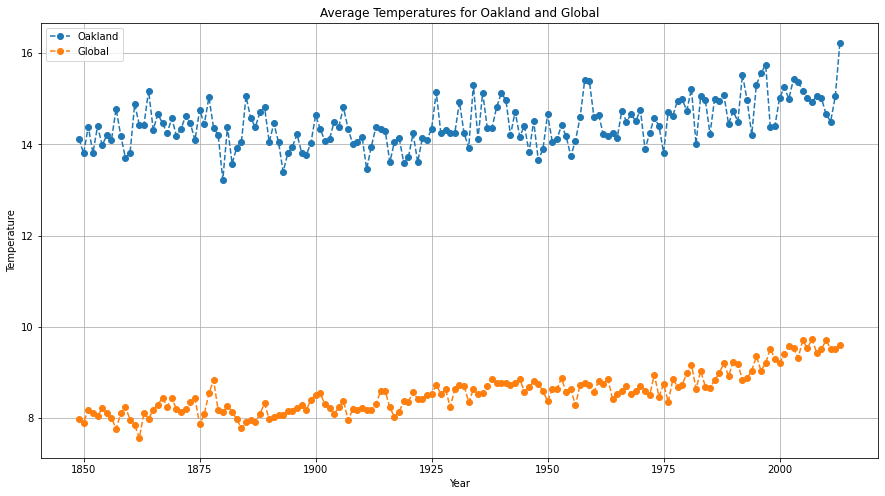

In [10]:
data.index = data['year']
plt.figure(figsize=[15,8])
plt.grid(True)
plt.title('Average Temperatures for Oakland and Global')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.plot(data['avg_temp'], label = 'Oakland', linestyle='dashed', marker='o')
plt.plot(data['global_avg_temp'], label = 'Global', linestyle='dashed', marker='o')
plt.legend(loc=2) # upper left hand corner

### It's unclear whether there is a trend in Oakland. I will smoothen the plot lines by calculating the moving temperature averages for both Oakland and the planet.

In [11]:
# resource: https://www.datacamp.com/community/tutorials/moving-averages-in-pandas
data['oakland_moving_avg_temp'] = data['avg_temp'].rolling(window=8).mean()
data['global_moving_avg_temp'] = data['global_avg_temp'].rolling(window=7).mean()
data.head(10)

,year,city,country,avg_temp,global_year,global_avg_temp,oakland_moving_avg_temp,global_moving_avg_temp
year,,,,,,,,
1849,1849,Oakland,United States,14.12,1849,7.98,NaN,NaN
1850,1850,Oakland,United States,13.80,1850,7.90,NaN,NaN
1851,1851,Oakland,United States,14.39,1851,8.18,NaN,NaN
1852,1852,Oakland,United States,13.81,1852,8.10,NaN,NaN
1853,1853,Oakland,United States,14.40,1853,8.04,NaN,NaN
1854,1854,Oakland,United States,13.98,1854,8.21,NaN,NaN
1855,1855,Oakland,United States,14.20,1855,8.11,NaN,8.074286
1856,1856,Oakland,United States,14.10,1856,8.00,14.10000,8.077143
1857,1857,Oakland,United States,14.78,1857,7.76,14.18250,8.057143


### I experimented with changing the window period from 1 to 10. Lower numbers give plotlines closer to the unsmoothened plotline of average temperatures. The higher the window period, the smoother are the plotlines. I eventually chose window period of 8 for Oakland to show the trend without deviating too much from the actual temperatures.

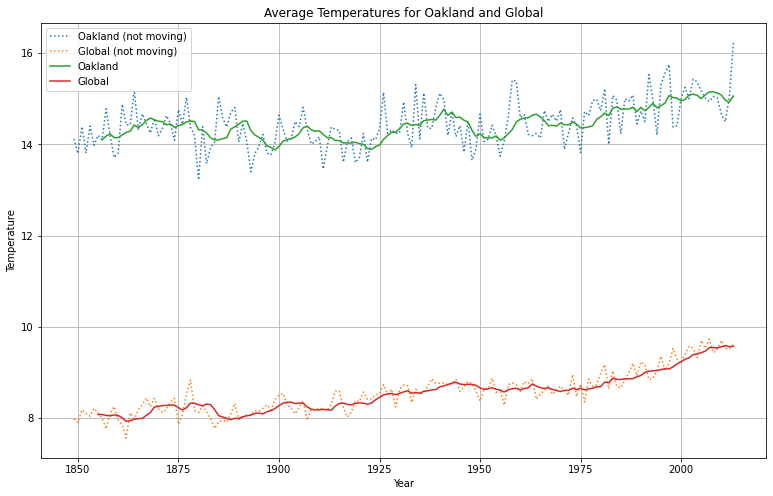

In [12]:
plt.figure(figsize=[13,8])
plt.title('Average Temperatures for Oakland and Global')
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.plot(data['avg_temp'], label = 'Oakland (not moving)', linestyle='dotted') # transpose over moving average
plt.plot(data['global_avg_temp'], label = 'Global (not moving)', linestyle='dotted')
plt.plot(data['oakland_moving_avg_temp'], label='Oakland')
plt.plot(data['global_moving_avg_temp'], label='Global')
plt.legend(loc=2)
plt.show()

## Observations

- Oakland's yearly average temperatures are higher than those of the whole planet.
- The plotline of  global average temperatures indicates that there is a general warming of the planet.
- Experimenting with different window periods for the moving average, it was not clear that there was a trend in Oakland. Settling for window period of 8, I noticed that there was a warming trend starting around the year 1975.
- In fact, the global warming trend was much clearer around the year 1975. Although there was already a subtle global warming trend around 1880s.
- Trusting the data, I would like to conclude that it is getting hotter globally and locally. But It was only clear in Oakland starting around 1975.


## Resources

- https://matplotlib.org/3.1.1/index.html
- https://www.datacamp.com/community/tutorials/moving-averages-in-pandas
- Python for Data Analysis by Wes McKinney first edition
- Intro to Data Analysis course

## Extra Credit

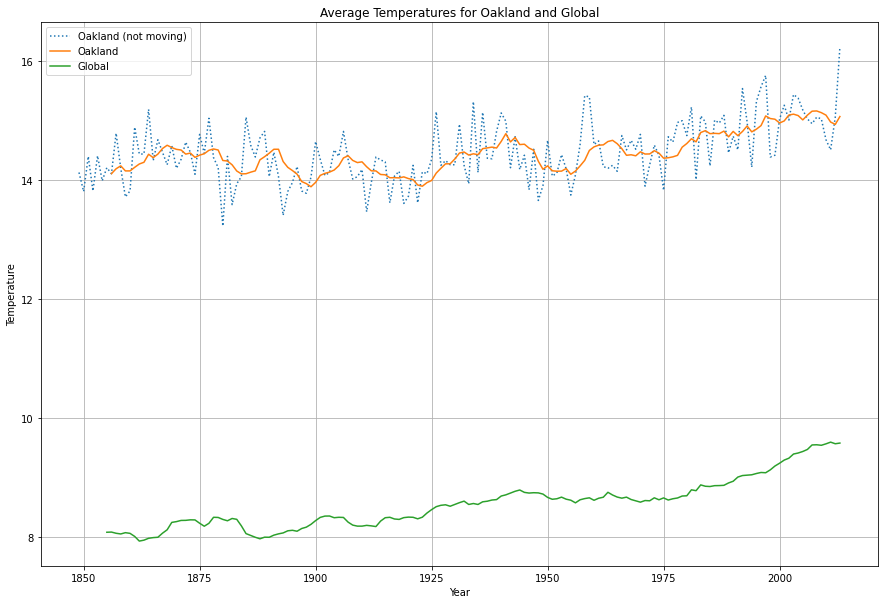

In [30]:
plt.figure(figsize=[15,10])
plt.title('Average Temperatures for Oakland and Global')
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.plot(data['avg_temp'], label = 'Oakland (not moving)', linestyle='dotted') # transpose over moving average
plt.plot(data['oakland_moving_avg_temp'], label='Oakland')
plt.plot(data['global_moving_avg_temp'], label='Global')
plt.legend(loc=2)